In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import xgboost as xgb
import joblib
import pickle
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [2]:
df_test = pd.read_csv("C:\\Users\\raisy\\Downloads\\spaceship-titanic\\test.csv")

#### Menampilkan informasi dataset yang diantaranya Nama Column, Jumlah Data, dan Type Data masing masing kolom 

In [3]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


#### Menampilkan data null tiap kolom dari dataset

In [4]:
df_test.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

#### Dapat dilihat dari informasi diatas, bahwa masih terdapat data null dari tiap kolomnya, maka dari itu data yang masih kosong/null harus dilakukan praproses terlebih dahulu dengan cara mengisi data sesuai dengan korelasi datanya. Data tidak didrop dikarenakan data yang null terlalu banyak dan jika dilakukan drop, maka dataset tidak seimbang atau tidak relevan

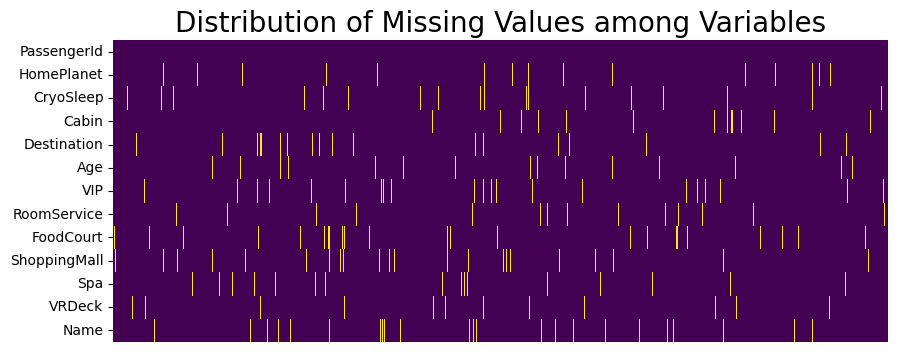

In [5]:
plt.figure(figsize=(10, 4),dpi=100)
sns.heatmap(df_test.isnull().transpose(), xticklabels=False, cbar=False, cmap='viridis')
plt.title('Distribution of Missing Values among Variables', fontsize=20)
plt.show()

In [6]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_nan=[features for features in df_test.columns if df_test[features].isnull().sum()>1]

HP = []

## 2- step print the feature name and the percentage of missing values
for features in features_with_nan:
    HP.append([np.round(df_test[features].isnull().mean(),4), features])
    print(features,np.round(df_test[features].isnull().mean(),4),'% missing values')

HomePlanet 0.0203 % missing values
CryoSleep 0.0217 % missing values
Cabin 0.0234 % missing values
Destination 0.0215 % missing values
Age 0.0213 % missing values
VIP 0.0217 % missing values
RoomService 0.0192 % missing values
FoodCourt 0.0248 % missing values
ShoppingMall 0.0229 % missing values
Spa 0.0236 % missing values
VRDeck 0.0187 % missing values
Name 0.022 % missing values


In [7]:
HP = pd.DataFrame(HP)

In [8]:
HP.rename(columns = {0:"Missing_Values"}, inplace = True)
HP.rename(columns = {1:"Column"}, inplace = True)

In [9]:
HP

,Missing_Values,Column
0,0.0203,HomePlanet
1,0.0217,CryoSleep
2,0.0234,Cabin
3,0.0215,Destination
4,0.0213,Age
5,0.0217,VIP
6,0.0192,RoomService
7,0.0248,FoodCourt
8,0.0229,ShoppingMall
9,0.0236,Spa


In [10]:
df_test.describe(include=('object','bool'))

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,4277,4190,4184,4177,4185,4184,4183
unique,4277,3,2,3265,3,2,4176
top,0013_01,Earth,False,G/160/P,TRAPPIST-1e,False,Cints Erle
freq,1,2263,2640,8,2956,4110,2


<AxesSubplot:xlabel='Age'>

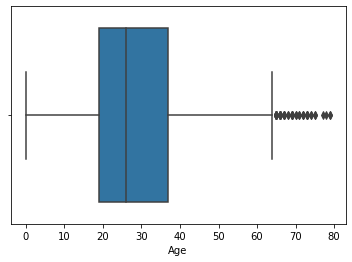

In [11]:
sns.boxplot(x="Age",data=df_test)

In [12]:
null_dat = pd.DataFrame()
null_dat['Number_Missing'] = df_test.isna().sum()
null_dat['PCT'] = null_dat['Number_Missing']/len(df_test)*100
print(null_dat)

              Number_Missing       PCT
PassengerId                0  0.000000
HomePlanet                87  2.034136
CryoSleep                 93  2.174421
Cabin                    100  2.338087
Destination               92  2.151040
Age                       91  2.127660
VIP                       93  2.174421
RoomService               82  1.917232
FoodCourt                106  2.478373
ShoppingMall              98  2.291326
Spa                      101  2.361468
VRDeck                    80  1.870470
Name                      94  2.197802


In [13]:
# plt.figure(figsize = (12,12))
# features = ['PassengerId', 'Name', 'Age', 'Cabin']

# corr_matrix = df_test[features].corr('spearman')
# sns.heatmap(corr_matrix, 
#             annot = True, 
#             cmap = 'flare', 
#             mask = np.triu(np.ones_like(corr_matrix, dtype = bool)),  
#             center = 0,
#             square = True, 
#             linewidths = 0.1 )

In [14]:
# fig, ax = plt.subplots(figsize=(20, 5)) #atur ukuran chart
# sns.catplot(ax=ax, x="Column", y='Missing_Values', data=HP)

##### Berartii yang nilainya mendekati 0 itu tidak ada korelasinya tetapi jika minus, artinya dia ada korelasi namun korelasinya negatif

<AxesSubplot:>

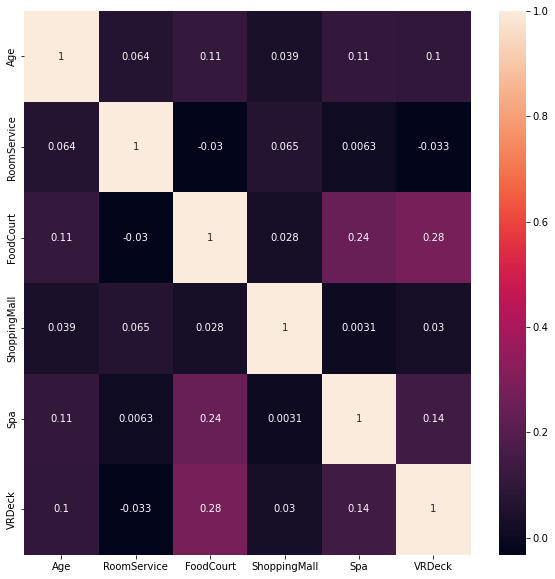

In [15]:
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(df_test.corr(), annot = True, ax=ax)

##### Membuat Kolom baru untuk memisah group id dengan idnya, dengan cara memecah UnderScore ('_')

In [16]:
df_test['PassenggerId_Split'] = df_test['PassengerId'].str.split('_', 1).str[0]

In [17]:
df_test.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,PassenggerId_Split
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0013
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0018
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0019
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0021
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0023


In [18]:
# df_test['PassenggerId_Split'] = df_test['PassenggerId_Split'].astype('Int64')

In [19]:
# df_test['Transported'].replace({False:0,True:1}, inplace=True)

In [20]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         4277 non-null   object 
 1   HomePlanet          4190 non-null   object 
 2   CryoSleep           4184 non-null   object 
 3   Cabin               4177 non-null   object 
 4   Destination         4185 non-null   object 
 5   Age                 4186 non-null   float64
 6   VIP                 4184 non-null   object 
 7   RoomService         4195 non-null   float64
 8   FoodCourt           4171 non-null   float64
 9   ShoppingMall        4179 non-null   float64
 10  Spa                 4176 non-null   float64
 11  VRDeck              4197 non-null   float64
 12  Name                4183 non-null   object 
 13  PassenggerId_Split  4277 non-null   object 
dtypes: float64(6), object(8)
memory usage: 467.9+ KB


In [21]:
# df_test['CryoSleep'] = df_test['CryoSleep'].astype('bool')
# df_test['VIP'] = df_test['VIP'].astype('bool')

In [22]:
# Explode sentences, from kolom
df_test[['Deck', 'Number','Side']] = df_test['Cabin'].str.split('/', expand=True)

In [23]:
# Drop Kolom
df_test = df_test.drop(["Cabin"], axis=1)
df_test = df_test.drop(["Name"], axis=1)

# Set PassengerId menjadi indeks
# df_test.set_index('PassengerId', inplace=True)

In [24]:
for col in df_test[['CryoSleep', 'VIP', 'HomePlanet', 'Destination', 'Deck', 'Number','Side']]:
    imp_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    imp_freq.fit(df_test[[col]])
    df_test[col] = imp_freq.fit_transform(df_test[[col]])

In [25]:
for col in df_test[['Age','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa','VRDeck']]:
    imp_med = SimpleImputer(missing_values=np.nan, strategy='median')
    imp_med.fit(df_test[[col]])
    df_test[col] = imp_med.fit_transform(df_test[[col]])

In [26]:
# Pengelompokkan umur
cat_1 = pd.cut(x=df_test.Age.astype(float),bins=[0,2,18,65,125],labels=['Infant','Child/Teen','Adult','Senior'])

In [27]:
df_test.insert(15,'Age_Group', cat_1)

In [28]:
cat_1.head(5)

0    Adult
1    Adult
2    Adult
3    Adult
4    Adult
Name: Age, dtype: category
Categories (4, object): ['Infant' < 'Child/Teen' < 'Adult' < 'Senior']

In [29]:
df_test["Age_Group"] = df_test['Age_Group'].fillna(df_test['Age_Group'].mode()[0],inplace=False)

In [30]:
df_test.isna().sum()

PassengerId           0
HomePlanet            0
CryoSleep             0
Destination           0
Age                   0
VIP                   0
RoomService           0
FoodCourt             0
ShoppingMall          0
Spa                   0
VRDeck                0
PassenggerId_Split    0
Deck                  0
Number                0
Side                  0
Age_Group             0
dtype: int64

In [31]:
df_test.head(5)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassenggerId_Split,Deck,Number,Side,Age_Group
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,0013,G,3,S,Adult
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,0018,F,4,S,Adult
2,0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,0019,C,0,S,Adult
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,0021,C,1,S,Adult
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,0023,F,5,S,Adult


In [32]:
df_test['Total_Bill'] = df_test['RoomService'] + df_test['FoodCourt'] + df_test['Spa']\
                        + df_test['VRDeck'] + df_test['ShoppingMall']

In [33]:
df_test.head(5)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassenggerId_Split,Deck,Number,Side,Age_Group,Total_Bill
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,0013,G,3,S,Adult,0.0
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,0018,F,4,S,Adult,2832.0
2,0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,0019,C,0,S,Adult,0.0
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,0021,C,1,S,Adult,7418.0
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,0023,F,5,S,Adult,645.0


In [34]:
df_test['Number'] = df_test['Number'].astype('Int64')
df_test['VIP'] = df_test['VIP'].astype('bool')
df_test['PassenggerId_Split'] = df_test['PassenggerId_Split'].astype('Int64')
df_test['CryoSleep'] = df_test['CryoSleep'].astype('bool')

df_test['Side'] = df_test['Side'].astype('category')
df_test['HomePlanet'] = df_test['HomePlanet'].astype('category')
df_test['Destination'] = df_test['Destination'].astype('category')
df_test['Deck'] = df_test['Deck'].astype('category')
df_test['PassengerId'] = df_test['PassengerId'].astype('int64')

In [35]:
cat_2 = pd.cut(x=df_test.Total_Bill.astype(float),bins=[-1,0,2500,5000,100000],
                                labels=['Miskin','Miskin_Menengah',
                                'Menengah','Kaya_Bang'])

df_test.insert(16,'Spending_Type', cat_2)

In [36]:
df_test.head(5)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassenggerId_Split,Deck,Number,Side,Age_Group,Spending_Type,Total_Bill
0,1301,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,13,G,3,S,Adult,Miskin,0.0
1,1801,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,18,F,4,S,Adult,Menengah,2832.0
2,1901,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,19,C,0,S,Adult,Miskin,0.0
3,2101,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,21,C,1,S,Adult,Kaya_Bang,7418.0
4,2301,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,23,F,5,S,Adult,Miskin_Menengah,645.0


In [37]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PassengerId         4277 non-null   int64   
 1   HomePlanet          4277 non-null   category
 2   CryoSleep           4277 non-null   bool    
 3   Destination         4277 non-null   category
 4   Age                 4277 non-null   float64 
 5   VIP                 4277 non-null   bool    
 6   RoomService         4277 non-null   float64 
 7   FoodCourt           4277 non-null   float64 
 8   ShoppingMall        4277 non-null   float64 
 9   Spa                 4277 non-null   float64 
 10  VRDeck              4277 non-null   float64 
 11  PassenggerId_Split  4277 non-null   Int64   
 12  Deck                4277 non-null   category
 13  Number              4277 non-null   Int64   
 14  Side                4277 non-null   category
 15  Age_Group           4277 non-null   ca

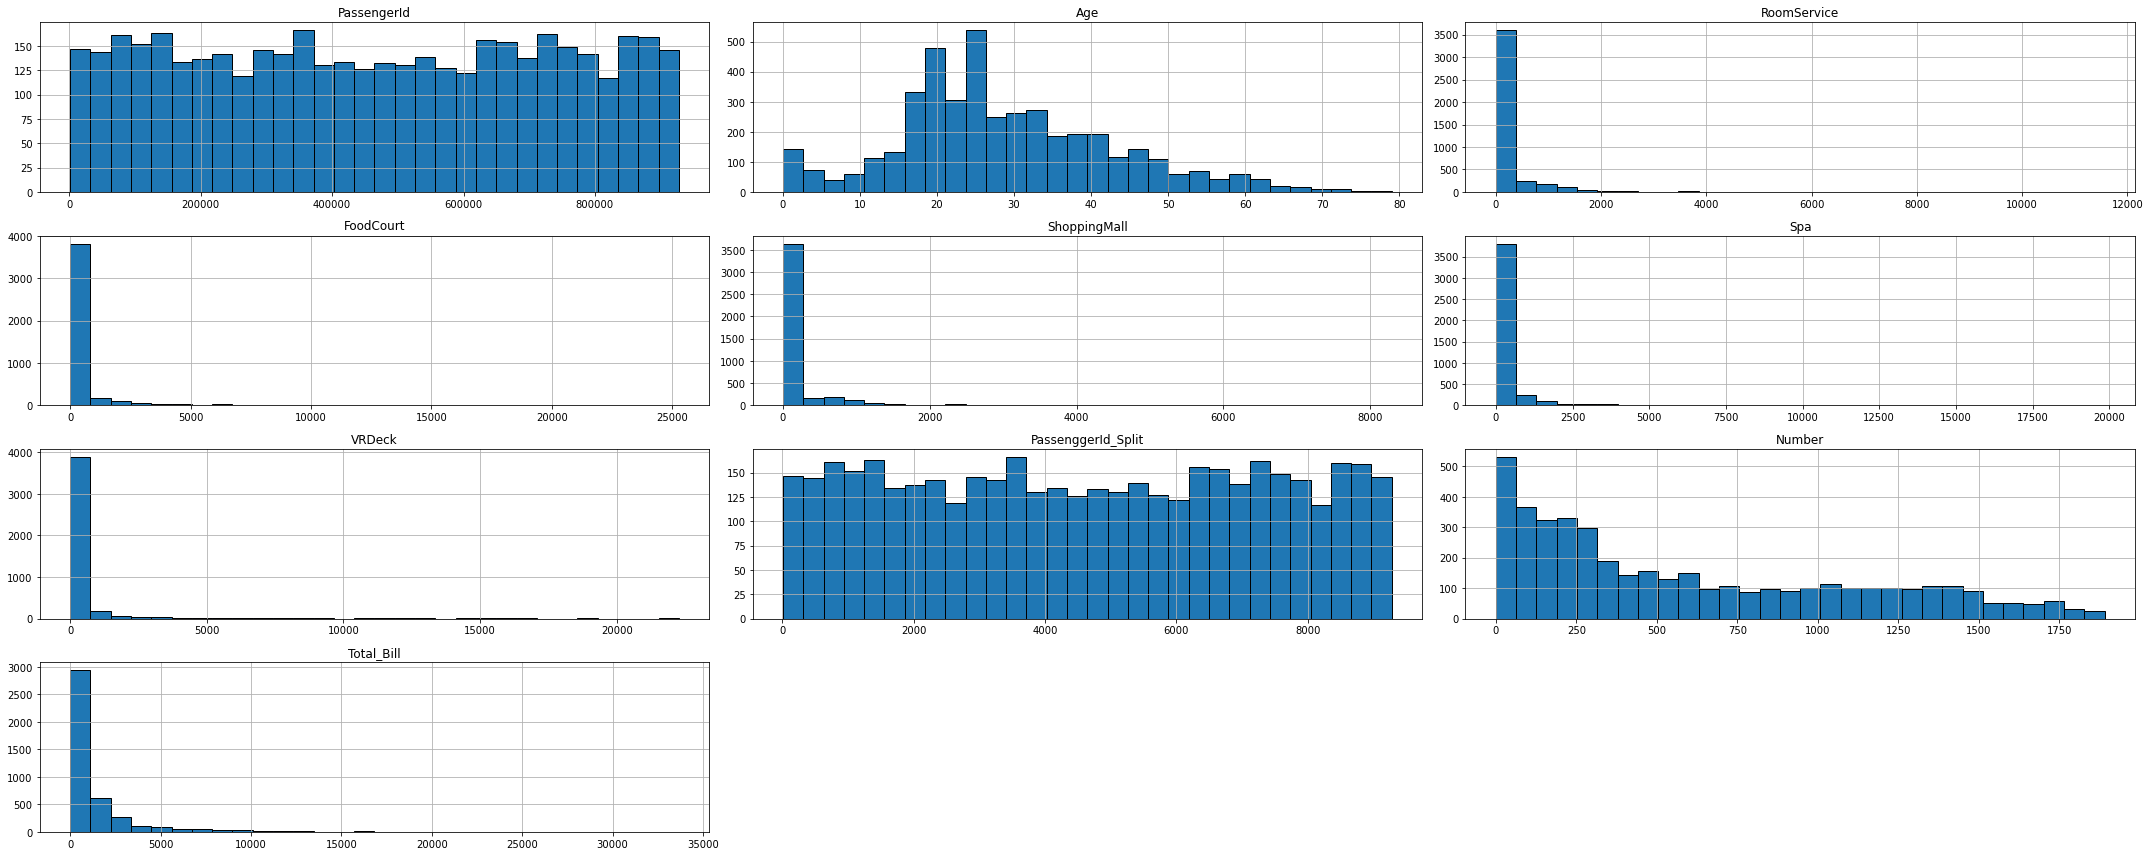

In [38]:
df_test.hist(figsize=(30,12), bins=30, ec='black')
plt.tight_layout()

<AxesSubplot:>

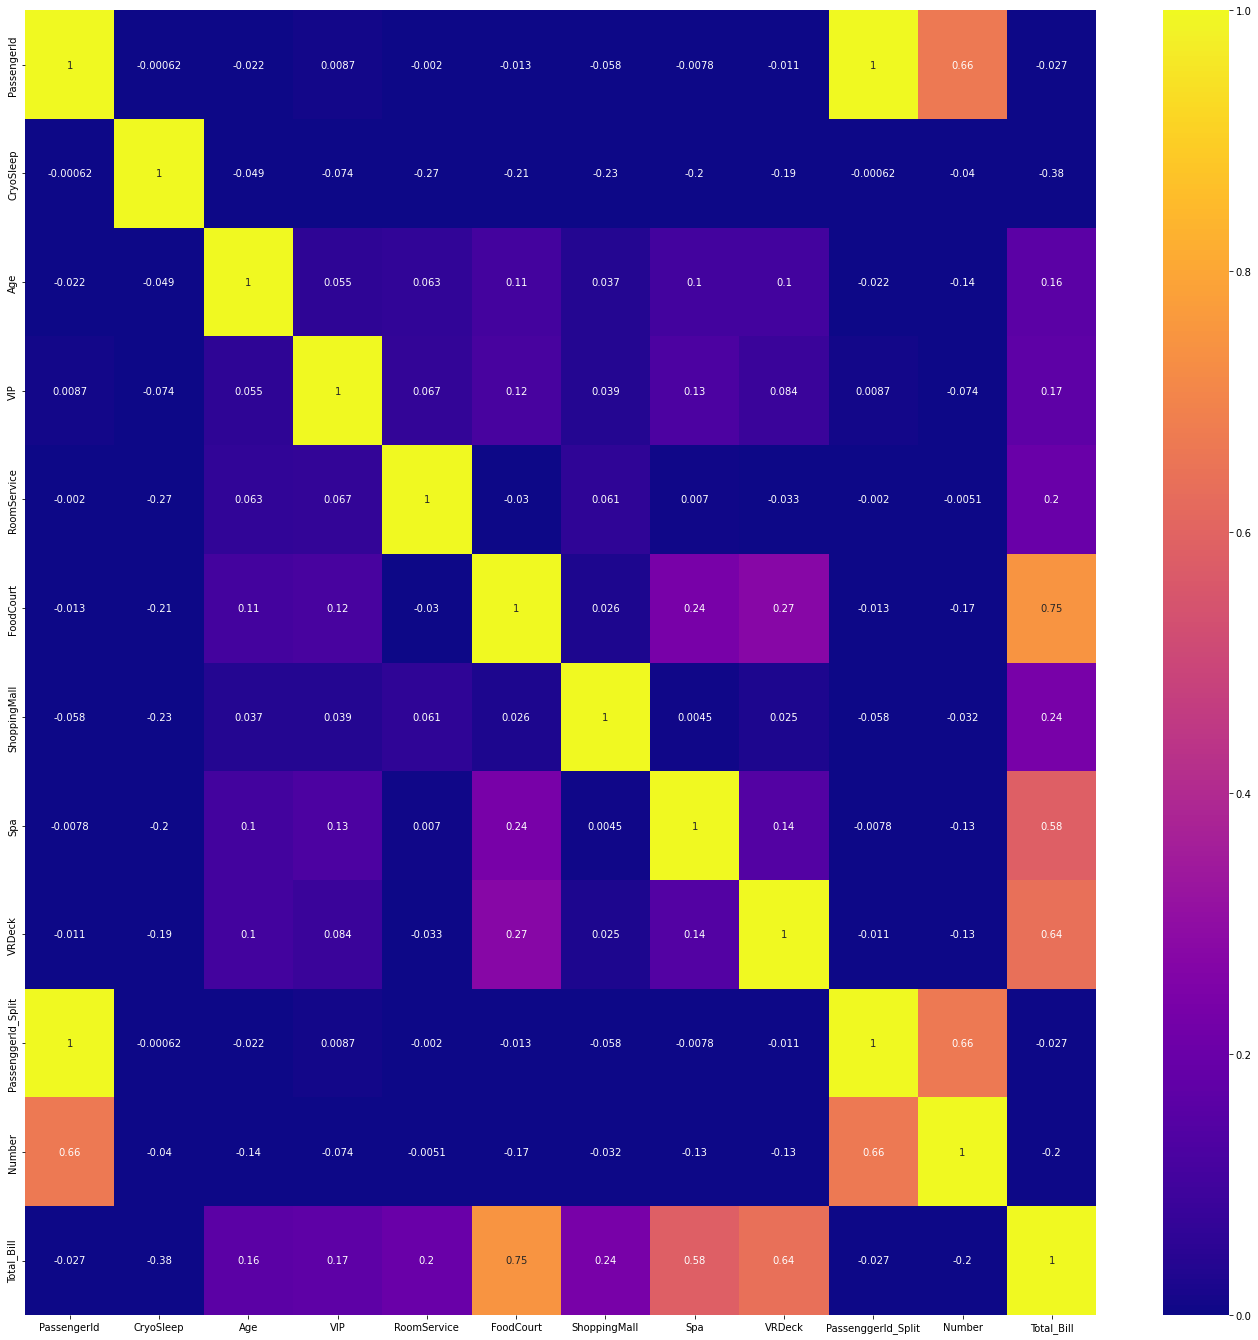

In [39]:
plt.figure(figsize=(24, 24))
sns.heatmap(df_test.corr(), annot=True, vmin=0, vmax=1, cmap='plasma')

In [40]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PassengerId         4277 non-null   int64   
 1   HomePlanet          4277 non-null   category
 2   CryoSleep           4277 non-null   bool    
 3   Destination         4277 non-null   category
 4   Age                 4277 non-null   float64 
 5   VIP                 4277 non-null   bool    
 6   RoomService         4277 non-null   float64 
 7   FoodCourt           4277 non-null   float64 
 8   ShoppingMall        4277 non-null   float64 
 9   Spa                 4277 non-null   float64 
 10  VRDeck              4277 non-null   float64 
 11  PassenggerId_Split  4277 non-null   Int64   
 12  Deck                4277 non-null   category
 13  Number              4277 non-null   Int64   
 14  Side                4277 non-null   category
 15  Age_Group           4277 non-null   ca

#### Bumi Misikin, Europa Kaya, Mars Miskin_Menengah

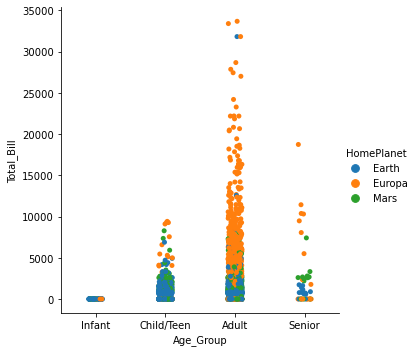

In [41]:
sns.catplot(y = "Total_Bill", x = "Age_Group", hue = "HomePlanet", data = df_test)

<AxesSubplot:xlabel='count', ylabel='HomePlanet'>

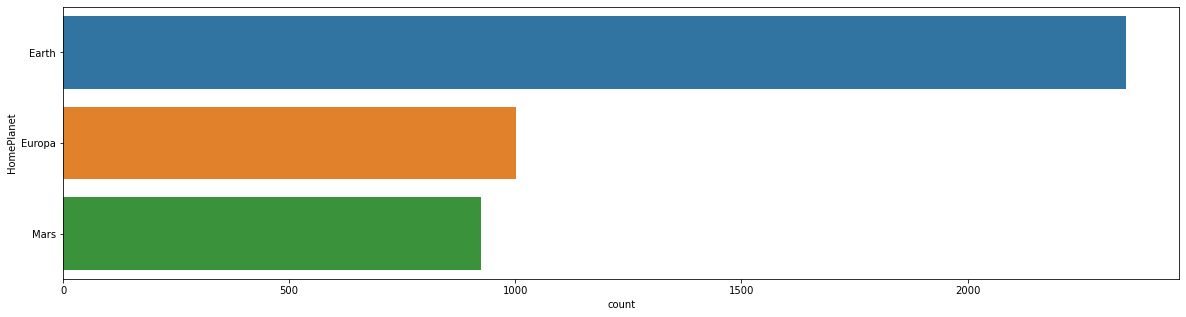

In [42]:
fig, ax = plt.subplots(figsize=(20, 5)) #atur ukuran chart
sns.countplot(ax=ax, y="HomePlanet", data=df_test)

<AxesSubplot:xlabel='count', ylabel='Age_Group'>

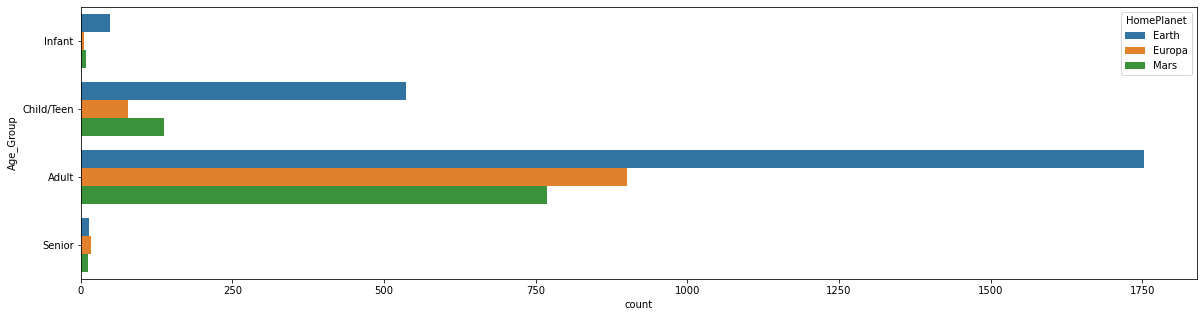

In [43]:
fig, ax = plt.subplots(figsize=(20, 5)) #atur ukuran chart
sns.countplot(ax=ax, y="Age_Group",hue='HomePlanet', data=df_test)

In [44]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PassengerId         4277 non-null   int64   
 1   HomePlanet          4277 non-null   category
 2   CryoSleep           4277 non-null   bool    
 3   Destination         4277 non-null   category
 4   Age                 4277 non-null   float64 
 5   VIP                 4277 non-null   bool    
 6   RoomService         4277 non-null   float64 
 7   FoodCourt           4277 non-null   float64 
 8   ShoppingMall        4277 non-null   float64 
 9   Spa                 4277 non-null   float64 
 10  VRDeck              4277 non-null   float64 
 11  PassenggerId_Split  4277 non-null   Int64   
 12  Deck                4277 non-null   category
 13  Number              4277 non-null   Int64   
 14  Side                4277 non-null   category
 15  Age_Group           4277 non-null   ca

In [45]:
# fig, ax = plt.subplots(figsize=(20, 5)) #atur ukuran chart
# sns.countplot(ax=ax, x="Transported", data=df_test)

<AxesSubplot:xlabel='Age_Group', ylabel='FoodCourt'>

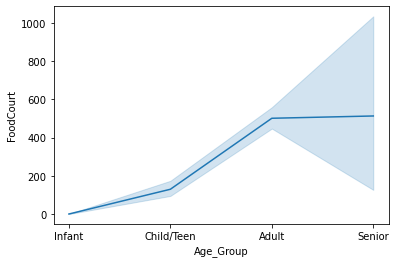

In [46]:
sns.lineplot(data=df_test, x="Age_Group", y="FoodCourt")

In [47]:
df_test['Age_Group'].unique()

['Adult', 'Child/Teen', 'Senior', 'Infant']
Categories (4, object): ['Infant' < 'Child/Teen' < 'Adult' < 'Senior']

In [48]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PassengerId         4277 non-null   int64   
 1   HomePlanet          4277 non-null   category
 2   CryoSleep           4277 non-null   bool    
 3   Destination         4277 non-null   category
 4   Age                 4277 non-null   float64 
 5   VIP                 4277 non-null   bool    
 6   RoomService         4277 non-null   float64 
 7   FoodCourt           4277 non-null   float64 
 8   ShoppingMall        4277 non-null   float64 
 9   Spa                 4277 non-null   float64 
 10  VRDeck              4277 non-null   float64 
 11  PassenggerId_Split  4277 non-null   Int64   
 12  Deck                4277 non-null   category
 13  Number              4277 non-null   Int64   
 14  Side                4277 non-null   category
 15  Age_Group           4277 non-null   ca

In [49]:
df_test['HomePlanet'].unique()

['Earth', 'Europa', 'Mars']
Categories (3, object): ['Earth', 'Europa', 'Mars']

In [50]:
df_test.to_csv('C:\\Users\\raisy\\Downloads\\spaceship-titanic\\test_final.csv', index=False)